# Ensemble Techniques And Its Types-4

Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.

*Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link*
1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.
2. Split the dataset into a training set (70%) and a test set (30%).
3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.
4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.
5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.
6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.
7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.
8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import numpy as ny
import matplotlib.pyplot as pt
from mlxtend.plotting import plot_decision_regions # For ploting decision boundaries

In [2]:
# Importing Datasets
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS47CNqqEUsYxoEa4eHA6IHR07OKbBMFkF4trKvkrk91z7joie7HcHKDVGYGKz42yO7KoUkQoZDgMKj/pub?gid=1334378409&single=true&output=csv"
ds = pd.read_csv(url)
ds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Knowing the variable
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


No Missing Value and no categorical variables so no encoding is required

In [4]:
# Spliting the dataset
x = ds.drop('target',axis=1)
y = ds['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state= 47, stratify = y)

# Training and Evaluating Baics Model
bmodel = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
bmodel.fit(x_train,y_train)
by_pred = bmodel.predict(x_test)
acc = accuracy_score(y_test,by_pred)
pre = precision_score(y_test,by_pred)
recal = recall_score(y_test,by_pred)
f1 = f1_score(y_test,by_pred)
print("Model Performance on Test Set:")
print(f"Accuracy:{acc:.4f}\n",f"Precision:{pre:.4f}\n",f"Recall:{recal:.4f}\n",f"F1 Score:{f1:.4f}")

Model Performance on Test Set:
Accuracy:0.7802
 Precision:0.7885
 Recall:0.8200
 F1 Score:0.8039


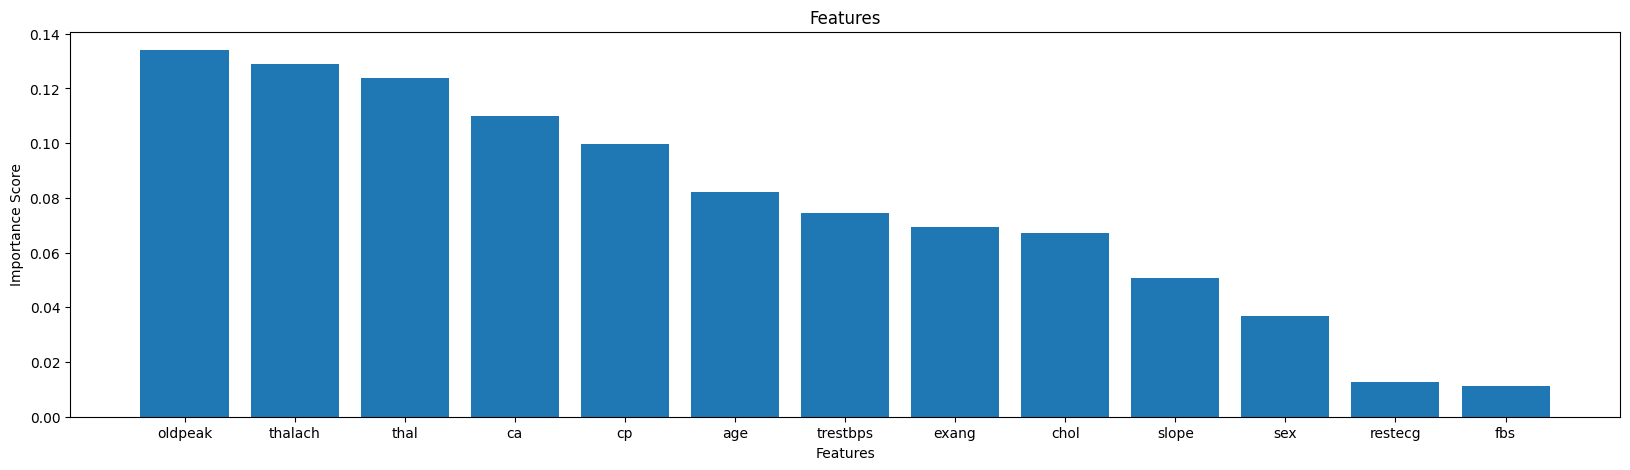

In [5]:
# Picking Important Feature
fi = bmodel.feature_importances_
i = ny.argsort(-fi)
f = x.columns[i]

# Visualising the Important Features
pt.figure(figsize=(20,5))
pt.bar(x=f,height=fi[i])
pt.title("Features")
pt.xlabel("Features")
pt.ylabel("Importance Score")
pt.show()

Here we can see, the Top 5 features are:
* oldpeak
* thalach
* thai
* ca
* cp

In [6]:
# Hyperparameter Tuning using GridSearchCV
grid = {'n_estimators':[50,100,200,300], 'max_depth':[5,10,15,20],
        'min_samples_split':[2,5,7,9], 'min_samples_leaf':[2,4,6,8]}

# Training Better Model
grid_model = GridSearchCV(RandomForestClassifier(random_state=42), grid, cv=5)
grid_model.fit(x_train,y_train)
best_params = grid_model.best_params_
best_model = grid_model.best_estimator_
print("Best Parameters are:\n",best_params)

# Evalation of model
bacc = cross_val_score(best_model, x_test, y_test, cv=5, scoring='accuracy').mean()
bpre = cross_val_score(best_model, x_test, y_test, cv=5, scoring='precision').mean()
brecal = cross_val_score(best_model, x_test, y_test, cv=5, scoring='recall').mean()
bf1 = cross_val_score(best_model, x_test, y_test, cv=5, scoring='f1').mean()
print("Model Performance with Best Models are:")
print(f"Accuracy:{bacc:.4f}\n",f"Precision:{bpre:.4f}\n",f"Recall:{brecal:.4f}\n",f"F1 Score:{bf1:.4f}")

Best Parameters are:
 {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Model Performance with Best Models are:
Accuracy:0.7813
 Precision:0.7529
 Recall:0.9000
 F1 Score:0.8176


C:\Users\SALESKEN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


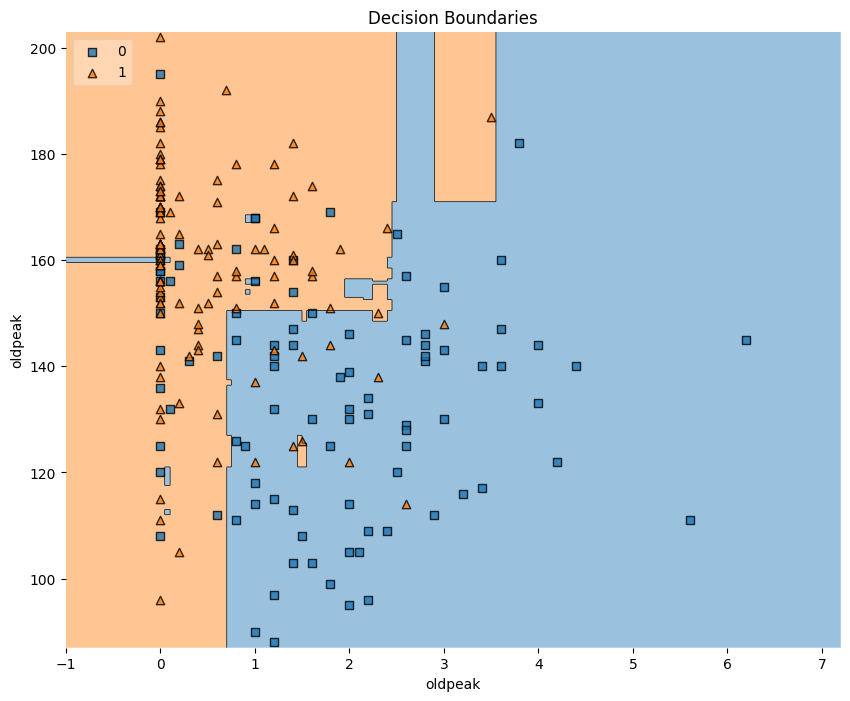

In [7]:
# Ploting Decision Boundaries with 2 most important features
X = x_train[f[:2]]
best_model.fit(X,y_train)
pt.figure(figsize=(10,8))
plot_decision_regions(ny.array(X), ny.array(y_train), clf=best_model, legend=2)
pt.xlabel(f[0])
pt.ylabel(f[0])
pt.title("Decision Boundaries")
pt.show()